#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Co-occurrence Analysis and Clustering`

#### Group:
- `Miguel Matos - 20221925`
- `Nuno Leandro - 20221861`
- `Patrícia Bezerra - 20221907`
- `Rita Silva - 20221920`
- `Vasco Capão - 20221906`

#### <font color='#BFD72F'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [0. Imports](#p0)
- [1. Specific Data Preparation](#p1)
- [2. Co-occurance Matrices](#p2)
- [3. Model Implementation](#p3)
    - [3.1 K-Means](#p3-1)
        - [3.1.1 Bag of Words (BoW)](#p3-1-1)
        - [3.1.2 Term Frequency-Inverse Document Frequency (TF-IDF)](#p3-1-2)
        - [3.1.3 Doc2Vec](#p3-1-3)

- [4. Model Evaluation](#p4)
    - [4.1 K-Means](#p4-1)
        - [4.1.1 Bag of Words (BoW)](#p4-1-1)
        - [4.1.2 Term Frequency-Inverse Document Frequency (TF-IDF)](#p4-1-2)
        - [4.1.3 Doc2Vec](#p4-1-3)
- [5. Conclusion](#p5)

<font color='#BFD72F' size=8>Co-occurrence Analysis and Clustering (Information Requirement 3321)</font> <a class="anchor" id="p0-0"></a>

"What dishes are mentioned together in the reviews? Do they form
clusters? Can you identify cuisine types based on those clusters?"

<font color='#BFD72F' size=6>0. Imports</font> <a class="anchor" id="p0"></a>

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/miguelmatos/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from utils.functions import *
from utils.pipeline_project import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miguelmatos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/miguelmatos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/miguelmatos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/miguelmatos/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<font color='#BFD72F' size=7>1. Data Understanding and Specific Preparation</font> <a class="anchor" id="p1"></a>

[Back to TOC](#toc)

In [18]:
dishes = pd.read_csv("Data/wikipedia_dishes.csv")
dishes.head()

Category         Dish
0  List of almond dishes       banket
1  List of almond dishes   anguillian
2  List of almond dishes     crackers
3  List of almond dishes    bear claw
4  List of almond dishes  almond roca

Let's transform the "Dish" column into a list.

In [19]:
dishes_list = [str(dish) for dish in dishes["Dish"]]

In the next output, we can see that the "dishes_list" contains 41,353 dishes. While the list of dishes isn't perfect due to some imperfections in the web scraping process, it still has the potential to yield some interesting results.

In [20]:
print(dishes_list)
len(dishes_list)

['banket', 'anguillian', 'crackers', 'bear claw', 'almond roca', 'bread dish', 'beijing', 'pecan pie', 'nigerian', 'puddings', 'chocolate', 'regional beverage', 'british', 'galette de rois', 'the godfather cocktail is prepared using equal part scotch whisky and amaretto1 amaretto is a sweet almond', 'sourdough bread', 'steak', 'cereals', 'gabonese', 'brittle', 'mont blanc', 'alpen food', 'almond meal', 'north korean', 'panocha mani', 'cheese', 'mexican', 'flatbreads', 'mushroom', 'dried', 'miserable cake', 'indian', 'soy', 'peladillas', 'chutneys', 'sri lankan', 'torta caprese', 'kai ladrillo', 'qurabiya', 'hawaiian', 'german', 'breakfast cereals drinks', 'jordan almond', 'ghoriba', 'sausage dish', 'pasta pasta dish', 'tarta de santiago', 'dessert sauce', 'arab', 'pies tart and flan', 'taiwanese', 'cheese dish fondues', 'fried dough', 'lists of food by ingredient', 'brined', 'tomato', 'bangladeshi', 'poppy seed', 'comfort', 'doughnuts', 'brand name snack', 'greek', 'nut barfi kaju katl

41353

Import the main dataset for cleaning and transformation.

In [21]:
main_df = pd.read_csv("Data/complete_df.csv", index_col = 0)
main_df.head()

Name                                             Review  Rating  \
0  Beyond Flavours  The ambience was good, food was quite good . h...     5.0   
1  Beyond Flavours  Ambience is too good for a pleasant evening. S...     5.0   
2  Beyond Flavours  A must try.. great food great ambience. Thnx f...     5.0   
3  Beyond Flavours  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Beyond Flavours  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                     preproc_reviews  
0  ambience good food quite good saturday lunch c...  
1  ambience good pleasant evening service prompt ...  
2  must try great food great ambience thnx servic...  
3  soumen da arun great guy behavior sincerety go...  
4  food ordered kodi drumstick basket mutton biry...

Below, we can see that there are missing values in the "preproc_reviews" column. These missing values appeared during the import process. However, since we are simplifying the dataframe to only use two columns, this will not be an issue.

In [22]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9954 non-null   object 
 1   Review           9954 non-null   object 
 2   Rating           9954 non-null   float64
 3   Cuisines         9954 non-null   object 
 4   preproc_reviews  9932 non-null   object 
dtypes: float64(1), object(4)
memory usage: 466.6+ KB


In [23]:
clustering_df = main_df[["Review", "Cuisines"]]
clustering_df = clustering_df.rename(columns= {"Review": "raw_content"})
clustering_df.head()

raw_content  \
0  The ambience was good, food was quite good . h...   
1  Ambience is too good for a pleasant evening. S...   
2  A must try.. great food great ambience. Thnx f...   
3  Soumen das and Arun was a great guy. Only beca...   
4  Food is good.we ordered Kodi drumsticks and ba...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1  Chinese, Continental, Kebab, European, South I...  
2  Chinese, Continental, Kebab, European, South I...  
3  Chinese, Continental, Kebab, European, South I...  
4  Chinese, Continental, Kebab, European, South I...

Now, we will use a function to create preprocessed reviews that will be used for BoW, TF-IDF, and Doc2Vec.

In [24]:
clustering_df = cluster_df_preproc(clustering_df)

In [25]:
clustering_df.head()

raw_content  \
0  The ambience was good, food was quite good. ha...   
1  Ambience is too good for a pleasant evening. S...   
2  A must try.. great food great ambience. Thnx f...   
3  Soumen das and Arun was a great guy. Only beca...   
4  Food is good.we ordered Kodi drumsticks and ba...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                     preproc_content  \
0  ambience good food quite good saturday lunch c...   
1  ambience good pleasant evening service prompt ...   
2  must try great food great ambience thnx servic...   
3  soumen da arun great guy behavior sincerety go...   
4  food ordered kodi drumstick basket mutton biry...   

                                     doc2vec_content  
0  The ambience was good food was quite good had ...  
1  Ambience is too good for a pleasant evening Se...  
2  A must try great food great ambience Thnx for ...  
3  Soumen das and Arun was a great guy Only becau...  
4  Food is ordered Kodi drumsticks and basket mut...

As we have the "dishes_list", the next step is to create a column that contains the dishes found in the "preproc_content" column. We will accomplish this by using a regular expression to identify the dishes from the "dishes_list" that appear in the "preproc_content" column.

In [26]:
clustering_df["extracted_dishes"] = clustering_df["preproc_content"].apply(lambda x: extract_dishes(x, dishes_list))

In [ ]:
clustering_df.to_csv("dishes.csv")

In [27]:
clustering_df.head()

raw_content  \
0  The ambience was good, food was quite good. ha...   
1  Ambience is too good for a pleasant evening. S...   
2  A must try.. great food great ambience. Thnx f...   
3  Soumen das and Arun was a great guy. Only beca...   
4  Food is good.we ordered Kodi drumsticks and ba...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                     preproc_content  \
0  ambience good food quite good saturday lunch c...   
1  ambience good pleasant evening service prompt ...   
2  must try great food great ambience thnx servic...   
3  soumen da arun great guy behavior sincerety go...   
4  food ordered kodi drumstick basket mutton biry...   

                                     doc2vec_content  \
0  The ambience was good food was quite good had ...   
1  Ambience is too good for a pleasant evening Se...   
2  A must try great food great ambience Thnx for ...   
3  Soumen das and Arun was a great guy Only becau...   
4  Food is ordered Kodi drumsticks and basket mut...   

              extracted_dishes  
0               [food, brunch]  
1                       [food]  
2  [food, penne, pasta, music]  
3                       [food]  
4              [food, biryani]

Now, let's take a look at the most common words in the dishes. To do this, we will need to create a column that represents the dishes as strings.

In [28]:
clustering_df["extracted_dishes_str"] = clustering_df["extracted_dishes"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

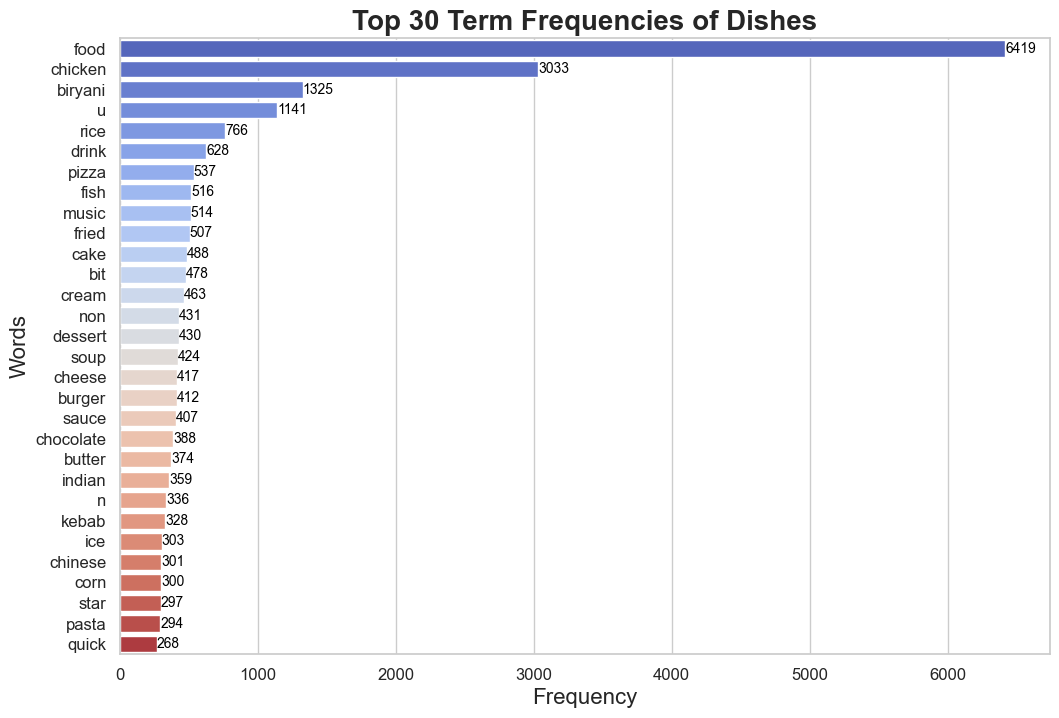

In [29]:
bow_vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r"(?u)\b\w+\b")

clean_text_td_matrix = bow_vectorizer.fit_transform(clustering_df["extracted_dishes_str"]).toarray()
clean_text_word_list = bow_vectorizer.get_feature_names_out().tolist()
clean_text_df = pipeline_project.word_freq_calculator(clean_text_td_matrix, clean_text_word_list, df_output= True)
pipeline_project.plot_term_frequency(clean_text_df, 30, "Dishes", show = False)

In [30]:
#instance the vectoriser and the word cloud generator
unigram_bow_vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r"(?u)\b\w+\b")
wc = WordCloud(background_color="white",max_words=100, width = 320,height = 220, color_func=lambda *args, **kwargs: (0,0,0))

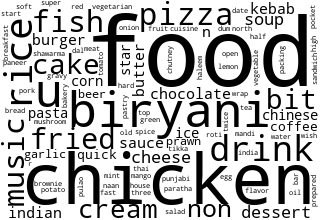

In [31]:
cluster_bow_td_matrix = unigram_bow_vectorizer.fit_transform(clustering_df["extracted_dishes_str"]).toarray()
clustering_df["initial_bow_vector"] = cluster_bow_td_matrix.tolist()
cluster_bow_word_list = unigram_bow_vectorizer.get_feature_names_out()

amazon_reviews_raw_vocabulary = pipeline_project.word_freq_calculator(cluster_bow_td_matrix,cluster_bow_word_list, df_output=False)
wc.generate_from_frequencies(amazon_reviews_raw_vocabulary)
wc.to_image()

In this WordCloud, we can see that words like "food", "music", "non", "soft", "quick", "bit", "top", and "star" are part of the vocabulary. Additionally, some single-character words appear in the top 30 most frequent words. This issue occurred because the web scraping code we used to gather the dishes vocabulary isn't perfect. To improve the results in the next visualizations, we will proceed to remove these words.

In [32]:
clustering_df['extracted_dishes'] = clustering_df['extracted_dishes'].apply(clean_word_list)

Since we have now removed some dishes, we need to check for missing values again.

In [33]:
len(clustering_df[clustering_df["extracted_dishes"].apply(len) == 0])

3323

We have found a significant number of missing values again, so in the next cell, we will remove them.

In [34]:
clustering_df[clustering_df["extracted_dishes"].apply(len) == 0] = np.nan
clustering_df.dropna(subset="extracted_dishes", inplace= True)

Now that we have removed some dishes, we need to recreate the column of dishes represented as strings, but this time, it will be cleaned.

In [35]:
clustering_df["extracted_dishes_str"] = clustering_df["extracted_dishes"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

For the upcoming work, we will create columns with the BoW, TF-IDF, and Doc2Vec vectors derived from the "extracted_dishes_str" column.

In [36]:
clustering_df = cluster_df_vectorizer(clustering_df, "extracted_dishes_str", "dishes")

100%|██████████| 6631/6631 [00:00<00:00, 187810.15it/s]


In [37]:
cluster_bow_td_matrix = np.array([[component for component in doc] for doc in clustering_df["bow_vector_dishes"]])
cluster_tfidf_td_matrix = np.array([[component for component in doc] for doc in clustering_df["tfidf_vector_dishes"]])
cluster_doc2vec_td_matrix = np.array([[component for component in doc] for doc in clustering_df["doc2vec_vector_dishes"]])

In [38]:
clustering_df.head()

raw_content  \
0  The ambience was good, food was quite good. ha...   
2  A must try.. great food great ambience. Thnx f...   
4  Food is good.we ordered Kodi drumsticks and ba...   
5  Ambiance is good, service is good, food is aPr...   
7  Well after reading so many reviews finally vis...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   
5  Chinese, Continental, Kebab, European, South I...   
7  Chinese, Continental, Kebab, European, South I...   

                                     preproc_content  \
0  ambience good food quite good saturday lunch c...   
2  must try great food great ambience thnx servic...   
4  food ordered kodi drumstick basket mutton biry...   
5  ambiance good service good food apradeecp subr...   
7  well reading many review finally visited good ...   

                                     doc2vec_content  \
0  The ambience was good food was quite good had ...   
2  A must try great food great ambience Thnx for ...   
4  Food is ordered Kodi drumsticks and basket mut...   
5  Ambiance is good service is good food is aPrad...   
7  Well after reading so many reviews finally vis...   

               extracted_dishes     extracted_dishes_str  \
0                      [brunch]                   brunch   
2                [penne, pasta]              penne pasta   
4                     [biryani]                  biryani   
5                     [hostess]                  hostess   
7  [corn, fish, biryani, suman]  corn fish biryani suman   

                                  initial_bow_vector  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                   bow_vector_dishes  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                 tfidf_vector_dishes  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                               doc2vec_vector_dishes  
0  [0.0014881996903568506, 0.022010909393429756, ...  
2  [-0.0030204360373318195, 0.02176964469254017, ...  
4  [0.007929890416562557, 0.013096322305500507, -...  
5  [0.003753695171326399, 0.0186388548463583, 0.0...  
7  [0.0051606185734272, 0.019801858812570572, 0.0...

<font color='#BFD72F' size=7>2. Co-occurance</font> <a class="anchor" id="p2"></a>

[Back to TOC](#toc)

Now, let's take a look at the co-occurrence matrix of the dishes extracted from the reviews.

In [39]:
co_occurrence_matrix = pipeline_project.cooccurrence_matrix_sentence_generator(clustering_df["extracted_dishes"].tolist())

100%|██████████| 6631/6631 [00:00<00:00, 250132.02it/s]


In [40]:
co_occurrence_matrix_no_diag = co_occurrence_matrix.copy()
np.fill_diagonal(co_occurrence_matrix_no_diag.values, 0)

fig = px.imshow(co_occurrence_matrix_no_diag.iloc[:60, :60], color_continuous_scale='YlGnBu', 
                labels=dict(x="Dish", y="Dish", color="Count"),
                title="Co-occurrence matrix for dishes (60 most frequent co-occurring dishes)", 
                width=1000, height=800)

fig.show()

- From this graph, we can see that "chicken" is by far the dish most correlated with the other dishes.
- **Naan & Butter** (mentioned together 74 times) are frequently referenced together, which makes sense since Naan is a type of bread commonly served with butter.
- **Cake & Chocolate** (mentioned together 67 times) are also frequently mentioned together, which is understandable given their close association as popular desserts.

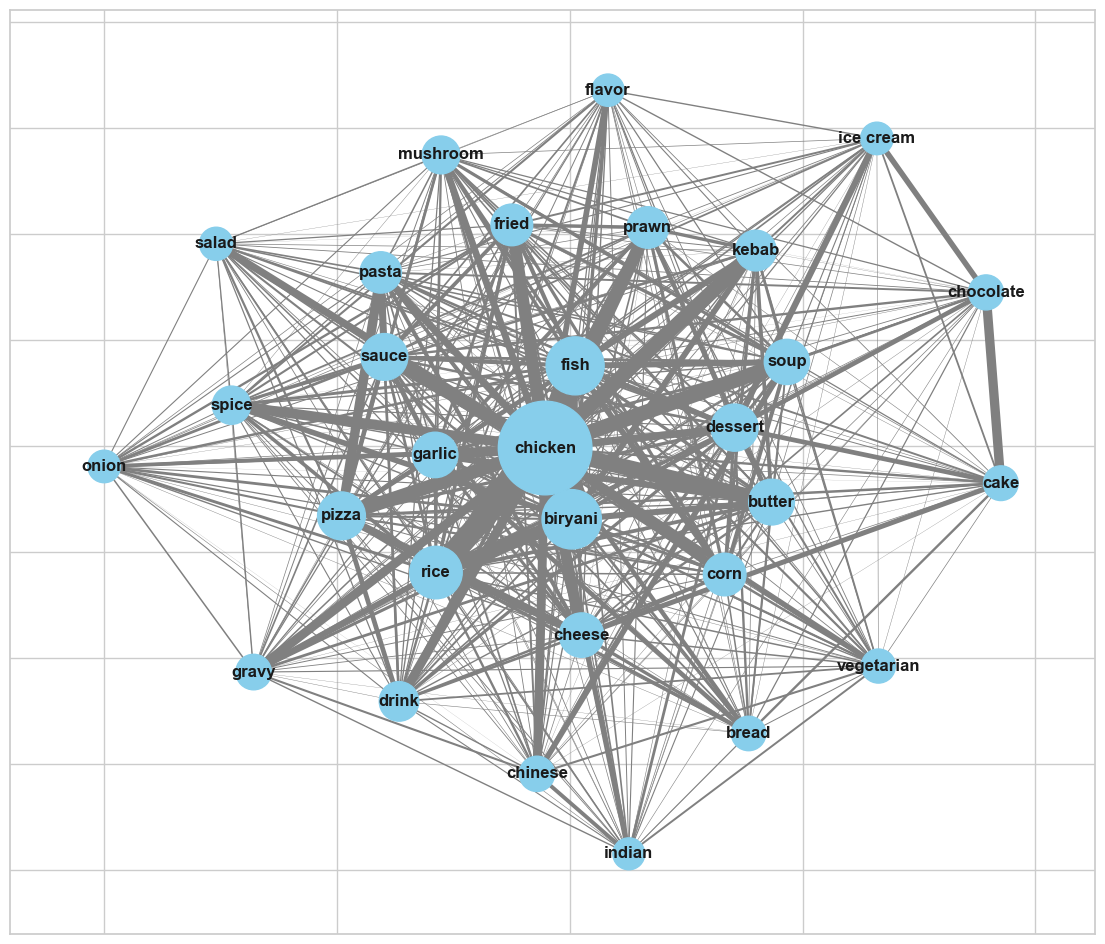

In [41]:
cooccurrence_network_generator(co_occurrence_matrix, 30)

Now, since "chicken" significantly affects the relationships between the dishes, let's take a look at the same visualizations without the word "chicken".

In [42]:
clustering_df['extracted_dishes_no_chicken'] = clustering_df['extracted_dishes'].apply(lambda lst: [word for word in lst if word != 'chicken'])

In [43]:
co_occurrence_matrix_2 = pipeline_project.cooccurrence_matrix_sentence_generator(clustering_df["extracted_dishes_no_chicken"].tolist())

100%|██████████| 6631/6631 [00:00<00:00, 276086.78it/s]


In [ ]:
co_occurrence_matrix_no_diag_2 = co_occurrence_matrix_2.copy()
np.fill_diagonal(co_occurrence_matrix_no_diag_2.values, 0)

fig = px.imshow(co_occurrence_matrix_no_diag_2.iloc[:60, :60], color_continuous_scale='YlGnBu', 
                labels=dict(x="Dish", y="Dish", color="Count"),
                title="Co-occurrence matrix for dishes (60 most frequent co-occurring dishes)", 
                width=1000, height=800)

fig.show()

Some of the most frequent co-occurrences:

- **Rice & Biryani** (96 times) – These dishes frequently co-occur, reflecting their natural association.
- **Butter & Naan** (74 times) – Highlighting their pairing as a popular combination, especially in traditional Indian cuisine.
- **Chocolate & Cake** (67 times) – Frequently mentioned together, which makes sense given their close association as popular desserts.
- **Pasta & Sauce** (51 times) – A classic pairing.
- **Pizza & Sauce** (34 times) – Shows a strong co-occurrence, which makes sense as sauce is an essential component of pizza.

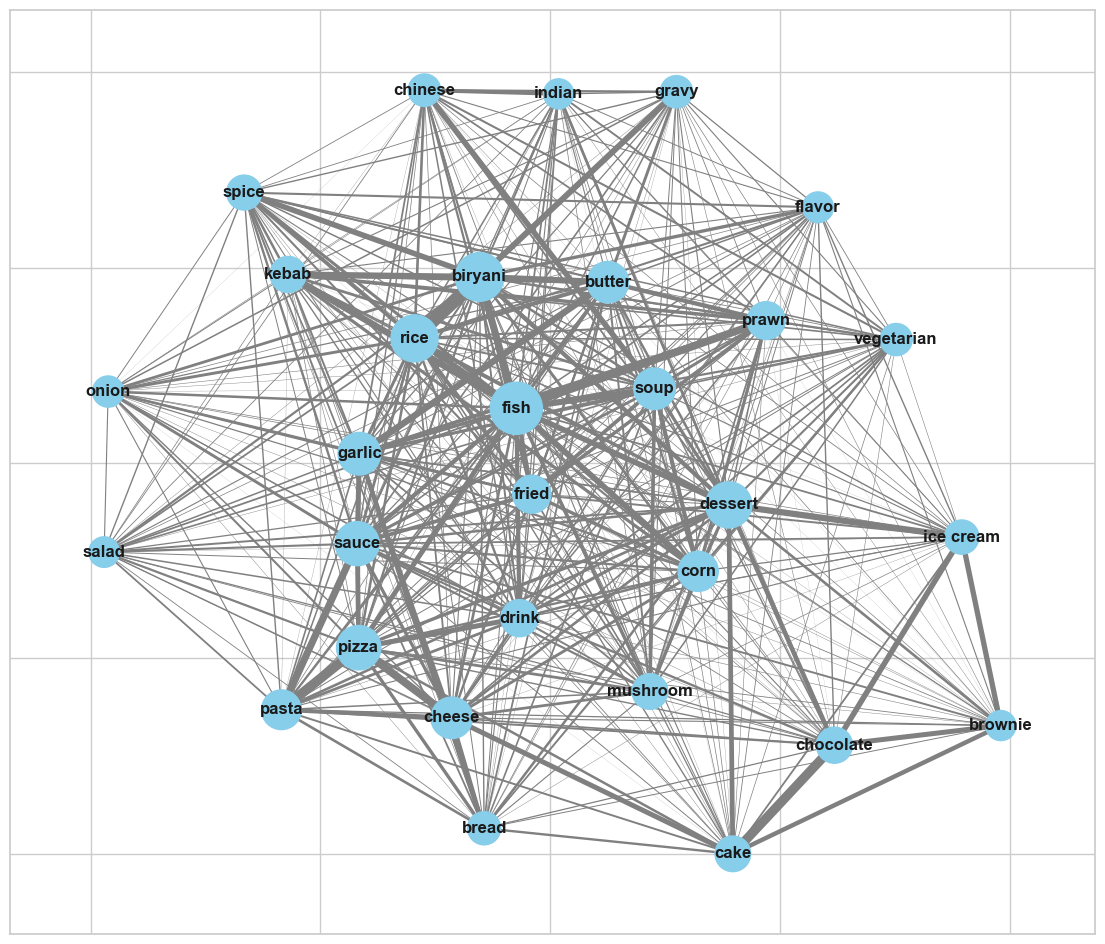

In [45]:
cooccurrence_network_generator(co_occurrence_matrix_2, 30)

As we can conclude, it was much easier to observe the relationship between words in both of the co-occurrence analysis graphs. For that reason, we will vectorize the dishes again, excluding the word "chicken," to proceed with the clustering without that word.

In [46]:
clustering_df["extracted_dishes_no_chicken_str"] = clustering_df["extracted_dishes_no_chicken"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
clustering_df = cluster_df_vectorizer(clustering_df, "extracted_dishes_no_chicken_str", "dishes_no_chicken")

100%|██████████| 6631/6631 [00:00<00:00, 223536.65it/s]


In [47]:
cluster_bow_td_matrix = np.array([[component for component in doc] for doc in clustering_df["bow_vector_dishes_no_chicken"]])
cluster_tfidf_td_matrix = np.array([[component for component in doc] for doc in clustering_df["tfidf_vector_dishes_no_chicken"]])
cluster_doc2vec_td_matrix = np.array([[component for component in doc] for doc in clustering_df["doc2vec_vector_dishes_no_chicken"]])

<font color='#BFD72F' size=7>3. Model Implementation</font> <a class="anchor" id="p3"></a>

[Back to TOC](#toc)

<font color='#BFD72F' size=6>3.1 K-Means</font> <a class="anchor" id="p3-1"></a>

<font color='#BFD72F' size=5>3.1.1 Bag of Words (BoW)</font> <a class="anchor" id="p3-1-1"></a>

Let's test the Kmeans Algorithm with BoW vectorization.

In [48]:
inertia_plotter(cluster_bow_td_matrix,20)

100%|██████████| 19/19 [00:06<00:00,  3.16it/s]


In [49]:
elbow_finder(cluster_bow_td_matrix,20,verbose=False)

100%|██████████| 20/20 [00:05<00:00,  3.45it/s]

Optimal value of k according to the elbow method: 9


9

In [50]:
kmeans_bow = KMeans(n_clusters= 6, random_state=0).fit(cluster_bow_td_matrix)
kmeans_labels_bow = kmeans_bow.labels_.tolist()
clustering_df["kmeans_bow_clusters"] = kmeans_bow.labels_.tolist()

<font color='#BFD72F' size=5>3.1.2 Term Frequency-Inverse Document Frequency (TF-IDF)</font> <a class="anchor" id="p3-1-2"></a>

[Back to TOC](#toc)

Now, let's test the Kmeans Algorithm with TF-IDF vectorization.

In [51]:
inertia_plotter(cluster_tfidf_td_matrix,20)

100%|██████████| 19/19 [00:05<00:00,  3.72it/s]


In [52]:
elbow_finder(cluster_tfidf_td_matrix,20,verbose=False)

100%|██████████| 20/20 [00:05<00:00,  3.85it/s]

Optimal value of k according to the elbow method: 10


10

In [53]:
kmeans_tfidf = KMeans(n_clusters=8, random_state=0).fit(cluster_tfidf_td_matrix)
kmeans_labels_tfidf = kmeans_tfidf.labels_.tolist()
clustering_df["kmeans_tfidf_clusters"] = kmeans_tfidf.labels_.tolist()

<font color='#BFD72F' size=5>3.1.3 Doc2Vec</font> <a class="anchor" id="p3-1-3"></a>

[Back to TOC](#toc)

Now, let's test the Kmeans Algorithm with Doc2Vec vectorization.

In [94]:
inertia_plotter(cluster_doc2vec_td_matrix,20)

100%|██████████| 19/19 [00:06<00:00,  3.16it/s]


In [95]:
elbow_finder(cluster_doc2vec_td_matrix,20,verbose=False)

100%|██████████| 20/20 [00:06<00:00,  3.22it/s]

Optimal value of k according to the elbow method: 6


6

In [98]:
kmeans_doc2vec = KMeans(n_clusters=6, random_state=0).fit(cluster_doc2vec_td_matrix)
kmeans_labels_doc2vec = kmeans_doc2vec.labels_.tolist()
clustering_df["kmeans_doc2vec_clusters"] = kmeans_doc2vec.labels_.tolist()

<font color='#BFD72F' size=7>4. Model Evaluation</font> <a class="anchor" id="p4"></a>

[Back to TOC](#toc)

<font color='#BFD72F' size=6>4.1 K-Means</font> <a class="anchor" id="p4-1"></a>

<font color='#BFD72F' size=5>4.1.1 Bag of Words (BoW)</font> <a class="anchor" id="p4-1-1"></a>

In [92]:
clustering_df = cluster_namer(clustering_df, "kmeans_bow_clusters")
clustering_df.head()

raw_content  \
0  The ambience was good, food was quite good. ha...   
2  A must try.. great food great ambience. Thnx f...   
4  Food is good.we ordered Kodi drumsticks and ba...   
5  Ambiance is good, service is good, food is aPr...   
7  Well after reading so many reviews finally vis...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   
5  Chinese, Continental, Kebab, European, South I...   
7  Chinese, Continental, Kebab, European, South I...   

                                     preproc_content  \
0  ambience good food quite good saturday lunch c...   
2  must try great food great ambience thnx servic...   
4  food ordered kodi drumstick basket mutton biry...   
5  ambiance good service good food apradeecp subr...   
7  well reading many review finally visited good ...   

                                     doc2vec_content  \
0  The ambience was good food was quite good had ...   
2  A must try great food great ambience Thnx for ...   
4  Food is ordered Kodi drumsticks and basket mut...   
5  Ambiance is good service is good food is aPrad...   
7  Well after reading so many reviews finally vis...   

               extracted_dishes     extracted_dishes_str  \
0                      [brunch]                   brunch   
2                [penne, pasta]              penne pasta   
4                     [biryani]                  biryani   
5                     [hostess]                  hostess   
7  [corn, fish, biryani, suman]  corn fish biryani suman   

                                  initial_bow_vector  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                   bow_vector_dishes  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                 tfidf_vector_dishes  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                               doc2vec_vector_dishes  \
0  [0.0014881996903568506, 0.022010909393429756, ...   
2  [-0.0030204360373318195, 0.02176964469254017, ...   
4  [0.007929890416562557, 0.013096322305500507, -...   
5  [0.003753695171326399, 0.0186388548463583, 0.0...   
7  [0.0051606185734272, 0.019801858812570572, 0.0...   

    extracted_dishes_no_chicken extracted_dishes_no_chicken_str  \
0                      [brunch]                          brunch   
2                [penne, pasta]                     penne pasta   
4                     [biryani]                         biryani   
5                     [hostess]                         hostess   
7  [corn, fish, biryani, suman]         corn fish biryani suman   

                        bow_vector_dishes_no_chicken  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                      tfidf_vector_dishes_no_chicken  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0

In [93]:
plotter_3d_cluster(clustering_df,"bow_vector_dishes_no_chicken","kmeans_bow_clusters")

Here, we will describe the cuisines identified in the clusters:

- Cluster 1: North Indian, dessert
- Cluster 2: biryani, chinese
- Cluster 3: italian, pizza
- Cluster 4: desserts, fast food, bakery
- Cluster 5: ice cream, desserts
- Cluster 6: seafood, chinese

In [77]:
top_cuisines_by_cluster(clustering_df, 'Cuisines', 'kmeans_bow_clusters')

Cluster Top 1 Cuisine  Top 1 Count Top 2 Cuisine  \
0  _drink_indian_dessert  North Indian         2667       Chinese   
1      _biryani_rice_dum  North Indian          594       Chinese   
2    _cheese_pizza_pasta   Continental          138  North Indian   
3    _cake_chocolate_red        Bakery          160      Desserts   
4     _ice_cream_dessert      Desserts          114  North Indian   
5       _rice_fried_fish       Chinese          248  North Indian   

   Top 2 Count Top 3 Cuisine  Top 3 Count  
0         1676   Continental         1109  
1          503       Biryani          384  
2          135       Italian          110  
3          145     Fast Food           67  
4           98     Ice Cream           79  
5          244         Asian          121

In [78]:
blacklist = ["North Indian", "Chinese", "Continental", "Italian", "Biryani", "Asian"]
output_df = top_cuisines_by_cluster(clustering_df, 'Cuisines', 'kmeans_bow_clusters', blacklist=blacklist)
output_df

Cluster Top 1 Cuisine  Top 1 Count Top 2 Cuisine  \
0  _drink_indian_dessert     Fast Food          648      Desserts   
1      _biryani_rice_dum       Mughlai          164        Andhra   
2    _cheese_pizza_pasta     Fast Food           79        Bakery   
3    _cake_chocolate_red        Bakery          160      Desserts   
4     _ice_cream_dessert      Desserts          114     Ice Cream   
5       _rice_fried_fish         Momos           64       Seafood   

   Top 2 Count  Top 3 Cuisine  Top 3 Count  
0          592   South Indian          408  
1           99     Hyderabadi           84  
2           58       Desserts           51  
3          145      Fast Food           67  
4           79  Mediterranean           25  
5           50   South Indian           41

In [79]:
score = silhouette_score(cluster_bow_td_matrix, kmeans_labels_bow)
print(f"Silhouette Score for KMeans: {score}")

Silhouette Score for KMeans: 0.046601181006200997


<font color='#BFD72F' size=5>4.1.2 Term Frequency-Inverse Document Frequency (TF-IDF)</font> <a class="anchor" id="p4-1-2"></a>

[Back to TOC](#toc)

In [80]:
clustering_df = cluster_namer(clustering_df, "kmeans_tfidf_clusters")
clustering_df.head()

raw_content  \
0  The ambience was good, food was quite good. ha...   
2  A must try.. great food great ambience. Thnx f...   
4  Food is good.we ordered Kodi drumsticks and ba...   
5  Ambiance is good, service is good, food is aPr...   
7  Well after reading so many reviews finally vis...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   
5  Chinese, Continental, Kebab, European, South I...   
7  Chinese, Continental, Kebab, European, South I...   

                                     preproc_content  \
0  ambience good food quite good saturday lunch c...   
2  must try great food great ambience thnx servic...   
4  food ordered kodi drumstick basket mutton biry...   
5  ambiance good service good food apradeecp subr...   
7  well reading many review finally visited good ...   

                                     doc2vec_content  \
0  The ambience was good food was quite good had ...   
2  A must try great food great ambience Thnx for ...   
4  Food is ordered Kodi drumsticks and basket mut...   
5  Ambiance is good service is good food is aPrad...   
7  Well after reading so many reviews finally vis...   

               extracted_dishes     extracted_dishes_str  \
0                      [brunch]                   brunch   
2                [penne, pasta]              penne pasta   
4                     [biryani]                  biryani   
5                     [hostess]                  hostess   
7  [corn, fish, biryani, suman]  corn fish biryani suman   

                                  initial_bow_vector  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                   bow_vector_dishes  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                 tfidf_vector_dishes  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                               doc2vec_vector_dishes  \
0  [0.0014881996903568506, 0.022010909393429756, ...   
2  [-0.0030204360373318195, 0.02176964469254017, ...   
4  [0.007929890416562557, 0.013096322305500507, -...   
5  [0.003753695171326399, 0.0186388548463583, 0.0...   
7  [0.0051606185734272, 0.019801858812570572, 0.0...   

    extracted_dishes_no_chicken extracted_dishes_no_chicken_str  \
0                      [brunch]                          brunch   
2                [penne, pasta]                     penne pasta   
4                     [biryani]                         biryani   
5                     [hostess]                         hostess   
7  [corn, fish, biryani, suman]         corn fish biryani suman   

                        bow_vector_dishes_no_chicken  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                      tfidf_vector_dishes_no_chicken  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0

In [81]:
plotter_3d_cluster(clustering_df,"tfidf_vector_dishes_no_chicken","kmeans_tfidf_clusters")

As before, we will describe the cuisines identified in the clusters:

- Cluster 1: pizza, dessert
- Cluster 2: biryani, chinese
- Cluster 3: biryani, north indian
- Cluster 4: chinese
- Cluster 5: fast food
- Cluster 6: ice cream, desserts
- Cluster 7: north indian, fast food
- Cluster 8: north indian, chinese, biryani

In [82]:
top_cuisines_by_cluster(clustering_df, "Cuisines", "kmeans_tfidf_clusters")

Cluster Top 1 Cuisine  Top 1 Count Top 2 Cuisine  Top 2 Count  \
0  _drink_pizza_dessert  North Indian         2731       Chinese         1679   
1     _biryani_dum_rice  North Indian          356       Chinese          296   
2   _pocket_biryani_dal  North Indian           64       Chinese           51   
3   _rice_fried_chinese       Chinese          314  North Indian          234   
4     _super_fast_drink  North Indian           79       Chinese           54   
5  _cream_ice_chocolate      Desserts          121     Ice Cream           85   
6  _north_indian_burger  North Indian          192       Chinese           93   
7   _spice_biryani_rice  North Indian           79       Chinese           52   

  Top 3 Cuisine  Top 3 Count  
0   Continental         1204  
1       Biryani          244  
2   Continental           29  
3         Asian          159  
4   Continental           31  
5  North Indian           58  
6   Continental           63  
7       Biryani           30

In [83]:
blacklist = ["North Indian", "Chinese", "Continental", "Italian", "Biryani", "Asian"]
output_df = top_cuisines_by_cluster(clustering_df, 'Cuisines', 'kmeans_tfidf_clusters', blacklist=blacklist)
output_df

Cluster Top 1 Cuisine  Top 1 Count Top 2 Cuisine  Top 2 Count  \
0  _drink_pizza_dessert      Desserts          721     Fast Food          704   
1     _biryani_dum_rice       Mughlai           85        Andhra           57   
2   _pocket_biryani_dal      Desserts           17     Fast Food           17   
3   _rice_fried_chinese       Seafood           76         Momos           76   
4     _super_fast_drink  South Indian           21     Fast Food           13   
5  _cream_ice_chocolate      Desserts          121     Ice Cream           85   
6  _north_indian_burger     Fast Food           50        Burger           49   
7   _spice_biryani_rice        Andhra           19       Mughlai           15   

   Top 3 Cuisine  Top 3 Count  
0         Bakery          461  
1        Seafood           44  
2         Bakery           12  
3           Thai           56  
4       Desserts           13  
5  Mediterranean           21  
6   South Indian           48  
7   South Indian           12

In [84]:
score = silhouette_score(cluster_tfidf_td_matrix, kmeans_labels_tfidf)
print(f"Silhouette Score for KMeans: {score}")

Silhouette Score for KMeans: 0.05814206351613513


<font color='#BFD72F' size=5>4.1.3 Doc2Vec (TF-IDF)</font> <a class="anchor" id="p4-1-3"></a>

[Back to TOC](#toc)

In [99]:
clustering_df = cluster_namer(clustering_df, "kmeans_doc2vec_clusters")
clustering_df.head()

raw_content  \
0  The ambience was good, food was quite good. ha...   
2  A must try.. great food great ambience. Thnx f...   
4  Food is good.we ordered Kodi drumsticks and ba...   
5  Ambiance is good, service is good, food is aPr...   
7  Well after reading so many reviews finally vis...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   
5  Chinese, Continental, Kebab, European, South I...   
7  Chinese, Continental, Kebab, European, South I...   

                                     preproc_content  \
0  ambience good food quite good saturday lunch c...   
2  must try great food great ambience thnx servic...   
4  food ordered kodi drumstick basket mutton biry...   
5  ambiance good service good food apradeecp subr...   
7  well reading many review finally visited good ...   

                                     doc2vec_content  \
0  The ambience was good food was quite good had ...   
2  A must try great food great ambience Thnx for ...   
4  Food is ordered Kodi drumsticks and basket mut...   
5  Ambiance is good service is good food is aPrad...   
7  Well after reading so many reviews finally vis...   

               extracted_dishes     extracted_dishes_str  \
0                      [brunch]                   brunch   
2                [penne, pasta]              penne pasta   
4                     [biryani]                  biryani   
5                     [hostess]                  hostess   
7  [corn, fish, biryani, suman]  corn fish biryani suman   

                                  initial_bow_vector  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                   bow_vector_dishes  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                 tfidf_vector_dishes  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                               doc2vec_vector_dishes  \
0  [0.0014881996903568506, 0.022010909393429756, ...   
2  [-0.0030204360373318195, 0.02176964469254017, ...   
4  [0.007929890416562557, 0.013096322305500507, -...   
5  [0.003753695171326399, 0.0186388548463583, 0.0...   
7  [0.0051606185734272, 0.019801858812570572, 0.0...   

    extracted_dishes_no_chicken extracted_dishes_no_chicken_str  \
0                      [brunch]                          brunch   
2                [penne, pasta]                     penne pasta   
4                     [biryani]                         biryani   
5                     [hostess]                         hostess   
7  [corn, fish, biryani, suman]         corn fish biryani suman   

                        bow_vector_dishes_no_chicken  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                      tfidf_vector_dishes_no_chicken  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0

In [100]:
plotter_3d_cluster(clustering_df,"doc2vec_vector_dishes_no_chicken","kmeans_doc2vec_clusters")

Cusines we identify in the clusters:

- Cluster 1: chinese, fast food
- Cluster 2: biryani, chinese
- Cluster 3: desserts, ice cream, bakery
- Cluster 4: chinese, north india, ice cream
- Cluster 5: italian, pizza
- Cluster 6: ice cream, desserts

In [101]:
top_cuisines_by_cluster(clustering_df, "Cuisines", "kmeans_doc2vec_clusters")

Cluster Top 1 Cuisine  Top 1 Count Top 2 Cuisine  \
0         _rice_drink_fried  North Indian         1682       Chinese   
1       _biryani_drink_rice  North Indian          952       Chinese   
2  _chocolate_dessert_cream  North Indian          250       Chinese   
3        _rice_indian_cream  North Indian          552       Chinese   
4       _pizza_pasta_cheese   Continental          143  North Indian   
5      _punjabi_gravy_jamun  North Indian          216       Chinese   

   Top 2 Count Top 3 Cuisine  Top 3 Count  
0         1112   Continental          639  
1          687       Biryani          363  
2          203      Desserts          173  
3          387   Continental          204  
4          141       Italian          130  
5          100   Continental           79

In [102]:
blacklist = ["North Indian", "Chinese", "Continental", "Italian", "Biryani", "Asian"]
output_df = top_cuisines_by_cluster(clustering_df, 'Cuisines', 'kmeans_doc2vec_clusters', blacklist=blacklist)
output_df

Cluster Top 1 Cuisine  Top 1 Count Top 2 Cuisine  \
0         _rice_drink_fried      Desserts          422     Fast Food   
1       _biryani_drink_rice       Mughlai          154     Fast Food   
2  _chocolate_dessert_cream      Desserts          173          Cafe   
3        _rice_indian_cream      Desserts          110  South Indian   
4       _pizza_pasta_cheese      Desserts           77     Fast Food   
5      _punjabi_gravy_jamun     Fast Food           47       Mughlai   

   Top 2 Count Top 3 Cuisine  Top 3 Count  
0          407  South Indian          258  
1          143  South Indian          128  
2          131     Fast Food          103  
3           85     Fast Food           82  
4           74        Bakery           62  
5           35      Desserts           33

In [103]:
score = silhouette_score(cluster_doc2vec_td_matrix, kmeans_labels_doc2vec)
print(f"Silhouette Score for KMeans: {score}")

Silhouette Score for KMeans: 0.1659020883361393


<font color='#BFD72F' size=7>5. Conclusion</font> <a class="anchor" id="p5"></a>

[Back to TOC](#toc)

In this task, we successfully accomplished everything that was proposed. We were able to visualize that dishes such as "Chicken" and "Biryani," "Cake" and "Chocolate," and "Pasta" and "Sauce" were frequently mentioned together in the reviews. Additionally, we identified clusters where, for example, "Cake," "Chocolate," and other associated words like "Ice Cream" were part of a cluster where the most frequent cuisine label (apart from the top 6 most frequent cuisine labels) was "Desserts."